In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading

In [2]:
train_data = pd.read_csv('./train.csv')
train_data.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [3]:
test_data = pd.read_csv('./test.csv')
test_data.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,25902,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,58,ICELAND,49.5,29.7,NaN,47
1,19535,EPX,Travel Agency,Online,2 way Comprehensive Plan,4,SINGAPORE,20.0,0.0,NaN,24
2,43717,EPX,Travel Agency,Online,2 way Comprehensive Plan,68,VIET NAM,20.0,0.0,NaN,36
3,48271,EPX,Travel Agency,Online,2 way Comprehensive Plan,41,CHINA,28.0,0.0,NaN,36
4,52318,EPX,Travel Agency,Online,Cancellation Plan,16,SINGAPORE,11.0,0.0,NaN,36


In [4]:
print("Train Data Shape:",train_data.shape)
print("Test Data Shape:",test_data.shape)

Train Data Shape: (50553, 12)
Test Data Shape: (12661, 11)


# Exploratory Data Analysis

In [5]:
target = train_data['Claim']
predictors = train_data.drop(['Claim'],axis=1)

# Check Numeric and Categorical Features

In [6]:
# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=['number']).columns
    return numeric_col


numeric_columns = numeric_features(predictors)
print("Numeric Features:")
print(numeric_columns)
print("===="*20)

# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=['number']).columns
    return categorical_col

categorical_columns = categorical_features(predictors)
print("Categorical Features:")
print(categorical_columns)

Numeric Features:
Index(['ID', 'Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object')
Categorical Features:
Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination', 'Gender'],
      dtype='object')


# Check Missing Data

In [7]:
# Function to identify the number of missing values in every feature
def missing_datas(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
    
    
missing_data = missing_datas(predictors)
print(missing_data)

                      Total   Percent
Gender                35953  0.711194
Age                       0  0.000000
Commision (in value)      0  0.000000
Net Sales                 0  0.000000
Destination               0  0.000000
Duration                  0  0.000000
Product Name              0  0.000000
Distribution Channel      0  0.000000
Agency Type               0  0.000000
Agency                    0  0.000000
ID                        0  0.000000


# Dropping missing values

In [8]:
# Function to drop missing values
def drop_missing(dataset, missing,value):
    dataset = dataset.drop((missing[missing['Percent'] > value]).index,axis= 1)
    print(dataset.isnull().sum().sort_values(ascending = False))
    return dataset 
    
predictors=drop_missing(predictors,missing_data,0.40)


Age                     0
Commision (in value)    0
Net Sales               0
Destination             0
Duration                0
Product Name            0
Distribution Channel    0
Agency Type             0
Agency                  0
ID                      0
dtype: int64


# Checking Target variable

In [9]:
def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(target)

0    98.534212
1     1.465788
Name: Claim, dtype: float64

# Univariate Analysis of Categorical Columns

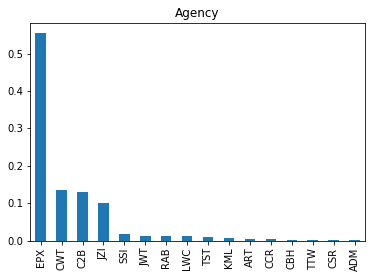

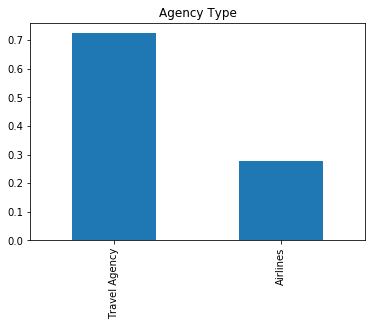

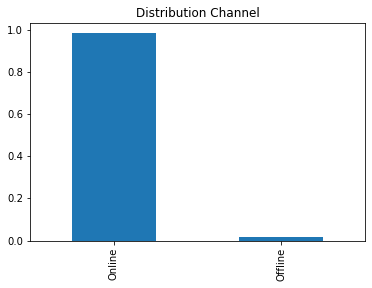

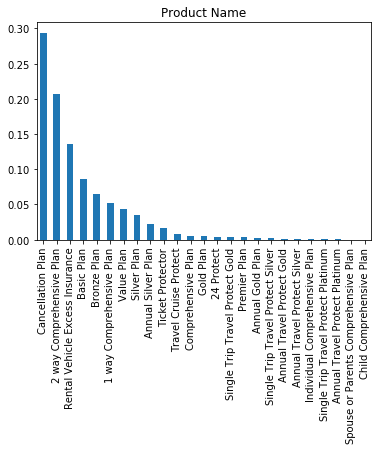

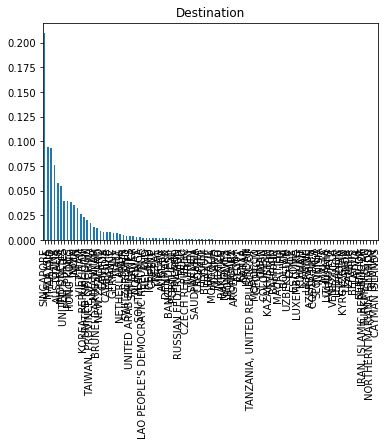

In [10]:
# Function to perform univariate analysis of categorical columns
def plot_categorical_columns(dataframe):
    categorical_columns = categorical_features(dataframe)
    dataframe = dataframe[categorical_columns]
    for i in dataframe:
        plt.title(i)
        dataframe[i].value_counts(normalize=True).plot(kind='bar')
        plt.show()

plot = plot_categorical_columns(predictors)

# Univariate analysis of Continuous columns

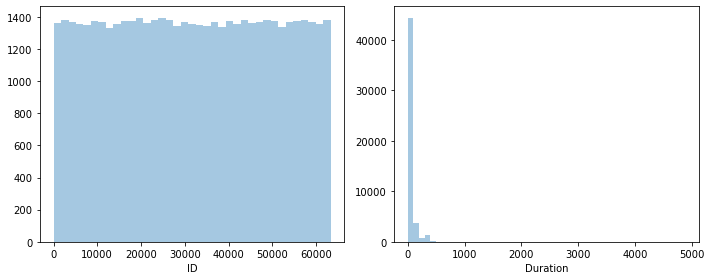

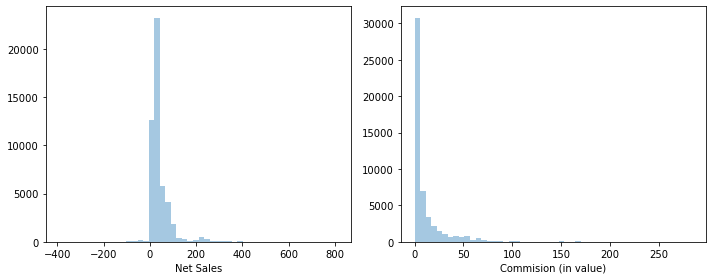

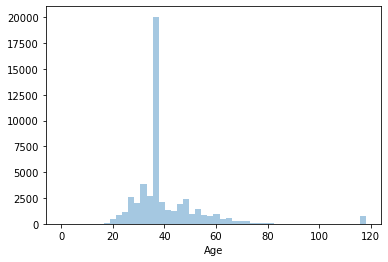

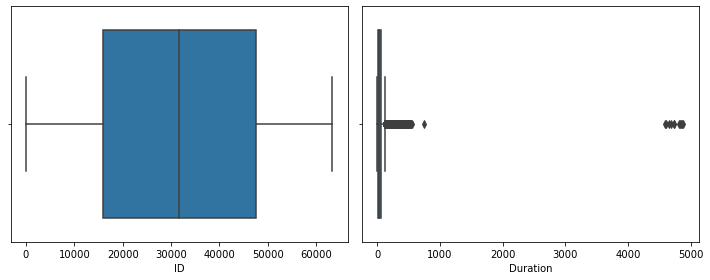

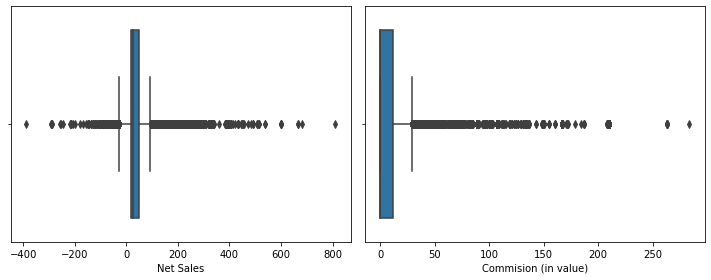

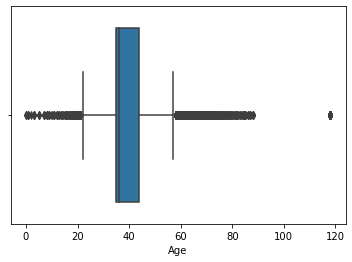

In [11]:
# Code Starts here

# Function to plot histograms
def plot_continuous_columns(dataframe):
    numeric_columns = numeric_features(dataframe)
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

# Function to plot boxplots
def plot_box_plots(dataframe):
    numeric_columns = numeric_features(dataframe)
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])

plot_continuous_columns(predictors)            
plot_box_plots(predictors)

# Code ends here

# Bivariate Analysis - Categorical Columns

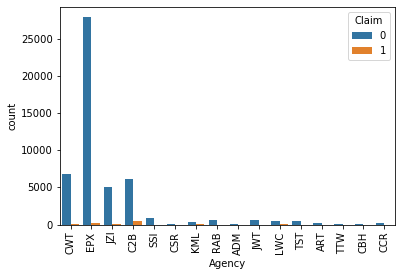

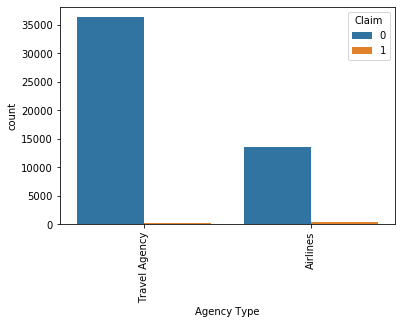

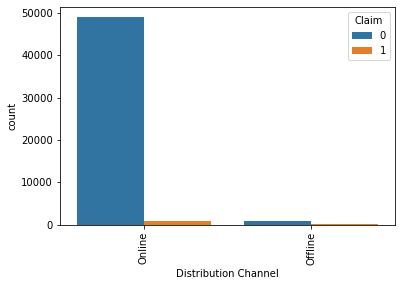

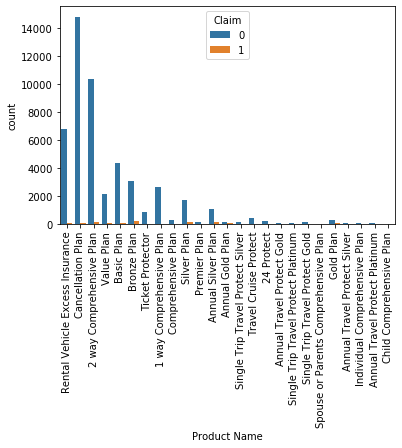

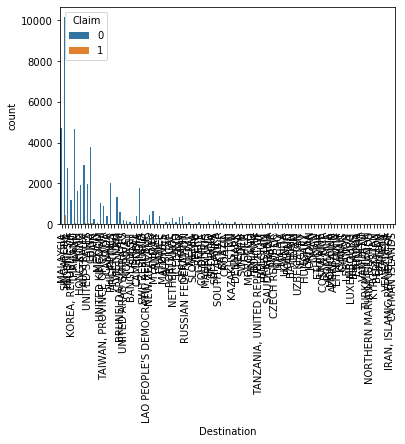

In [12]:
def bivariate_analysis_categorical(dataframe,target):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(exclude=np.number).columns:
            sns.countplot(x=dataframe[col],hue=target,data=dataframe)
            plt.xticks(rotation='vertical')
            plt.show()

bivariate_analysis_categorical(predictors,target)

# Finding Correlation between Features

Highly Correlated Variables


Series([], dtype: float64)

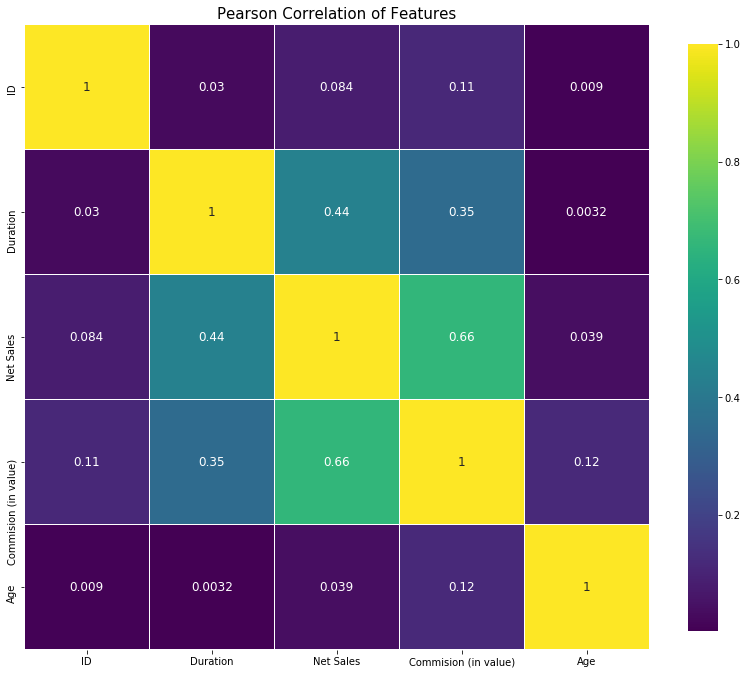

In [13]:
# Code Starts here

#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = 'viridis',
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    
    correlation = df.corr().unstack().sort_values(kind='quicksort')
    print('Highly Correlated Variables')
    return correlation[((correlation>=0.75) | (correlation<=-0.75)) & (correlation!=1)]

correlation_heatmap(predictors)

# Code Ends Here

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,accuracy_score,classification_report,roc_curve,confusion_matrix,precision_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE

In [15]:
# Code Starts here

le = LabelEncoder()
# Function that auto encodes any dataframe column of type category or object.
def dummyEncode(dataset):
        
        columnsToEncode = list(dataset.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                dataset[feature] = le.fit_transform(dataset[feature])
            except:
                print('Error encoding '+feature)
        return dataset
predictors = dummyEncode(predictors)
predictors.head()
# Code ends here

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,3433,6,1,1,16,7,56,0.0,17.82,31
1,4339,7,1,1,10,85,79,69.0,0.00,36
2,34590,6,1,1,16,11,56,19.8,11.88,75
3,55816,7,1,1,1,16,38,20.0,0.00,32
4,13816,7,1,1,10,10,47,15.0,0.00,29


# Baseline Model and Feature Engineering

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target, test_size=0.3, random_state=5)

In [17]:
global X_test,Y_test

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6969
           1       0.25      0.01      0.02       109

    accuracy                           0.98      7078
   macro avg       0.62      0.50      0.50      7078
weighted avg       0.97      0.98      0.98      7078

ROC_AUC_SCORE is 0.5043719170481069


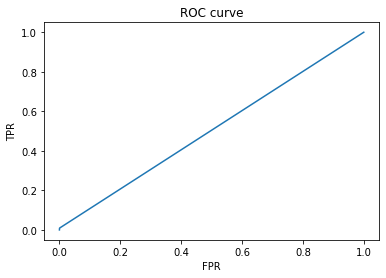

AUC Score = 50.44 %
On Model - 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6969
           1       0.06      0.06      0.06       109

    accuracy                           0.97      7078
   macro avg       0.52      0.52      0.52      7078
weighted avg       0.97      0.97      0.97      7078

ROC_AUC_SCORE is 0.5242179981859375


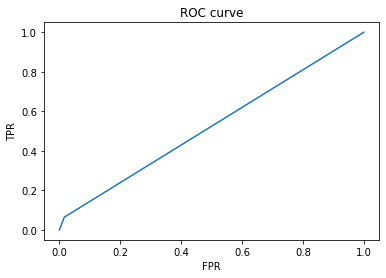

AUC Score = 52.42 %
On Model - 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6969
           1       0.17      0.01      0.02       109

    accuracy                           0.98      7078
   macro avg       0.58      0.50      0.50      7078
weighted avg       0.97      0.98      0.98      7078

ROC_AUC_SCORE is 0.5042284244379763


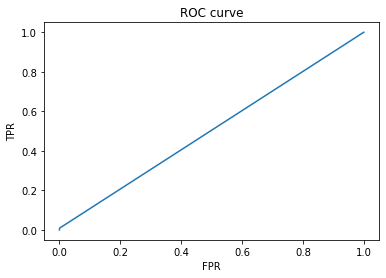

AUC Score = 50.42 %
On Model - 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6969
           1       0.33      0.01      0.02       109

    accuracy                           0.98      7078
   macro avg       0.66      0.50      0.51      7078
weighted avg       0.97      0.98      0.98      7078

ROC_AUC_SCORE is 0.5044436633531721


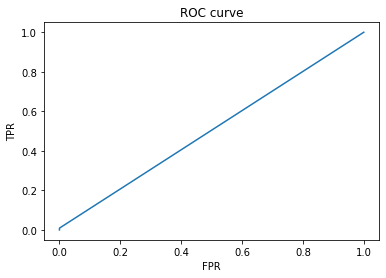

AUC Score = 50.44 %
On Model - 
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6969
           1       0.00      0.00      0.00       109

    accuracy                           0.98      7078
   macro avg       0.49      0.50      0.50      7078
weighted avg       0.97      0.98      0.98      7078

ROC_AUC_SCORE is 

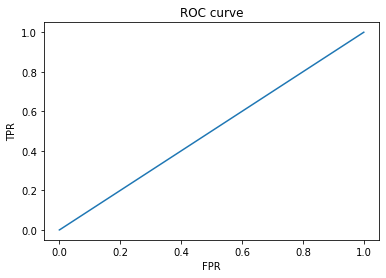

AUC Score = 49.99 %
On Model - 
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [18]:
def run_model(predictor_train,target_train, model):
    '''
    Performs model training and tests using ROC-AUC 
    returns AUC score
    '''
    x_train,x_val,y_train,y_val = train_test_split(predictor_train,target_train,test_size=0.2,random_state=42)
    model.fit(x_train, y_train)
    y_scores = model.predict(x_val)
    auc = roc_auc_score(y_val, y_scores)
    print(classification_report(y_val,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
    print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return auc

models = [LogisticRegression,DecisionTreeClassifier, RandomForestClassifier,XGBClassifier,GradientBoostingClassifier]
for model in models:
    # run model
    model = model()
    auc = run_model(X_train, Y_train, model) # train and returns AUC test score
    print('AUC Score = %.2f' %(auc*100) +' %\nOn Model - \n'+str(model))
    print('===='*20)

# Finding Best Parameters

In [19]:
def grid_search_random_forrest(dataframe,target):
    X = dataframe
    y = target
    

    x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
    rfc = RandomForestClassifier()
    param_grid = { 
#     'n_estimators': [11],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
    grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
    grid_search_model.fit(x_train, y_train)
    
    return grid_search_model.best_params_

print('Best Parameters are:')
grid_search_random_forrest(X_train,Y_train)

Best Parameters are:


{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto'}

On Validation data
ROC_AUC_SCORE is 0.7263401392752611
              precision    recall  f1-score   support

           0       0.99      0.87      0.93     10448
           1       0.07      0.58      0.12       169

    accuracy                           0.87     10617
   macro avg       0.53      0.73      0.53     10617
weighted avg       0.98      0.87      0.92     10617



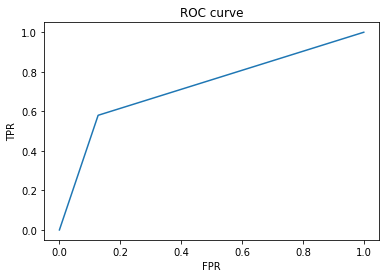

On Test data
ROC_AUC_SCORE is 0.717582346870024
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     14954
           1       0.06      0.56      0.11       212

    accuracy                           0.87     15166
   macro avg       0.53      0.72      0.52     15166
weighted avg       0.98      0.87      0.92     15166



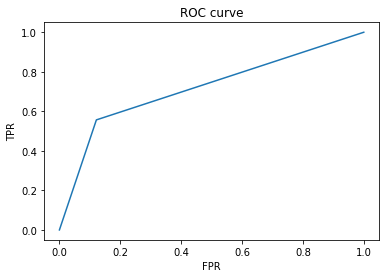

In [21]:

from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import ADASYN
from collections import Counter


def grid_search_random_forrest_best(dataframe,target):
    X = dataframe
    y = target
    
    x_train,x_val,y_train,y_val = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Applying Smote for dealing with class imbalance
    oversample = ADASYN()
    X_res, y_res = oversample.fit_resample(x_train,y_train)
    
    
    rfc = RandomForestClassifier(max_features='auto', max_depth=4, criterion='gini')
    rfc.fit(X_res, y_res)
    y_pred = rfc.predict(x_val)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    print('On Validation data')
    print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
    
    print('On Test data')
    y_pred = rfc.predict(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
    
    print('ROC_AUC_SCORE is',roc_auc_score(Y_test, y_pred))
    print(classification_report(Y_test, y_pred))
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
    
    
    
    

# Applying the best paramaters on the best features obtained using RFE
grid_search_random_forrest_best(X_train,Y_train)

# Balancing Dataset

In [22]:
from collections import Counter

print("Before Resampling:")
counter = Counter(Y_train)
print(counter)
# transform the dataset
oversample = ADASYN()
X_res, Y_res = oversample.fit_resample(X_train, Y_train)
# summarize the new class distribution
print("After Resampling:")
counter = Counter(Y_res)
print(counter)

Before Resampling:
Counter({0: 34858, 1: 529})
After Resampling:
Counter({1: 34972, 0: 34858})


# Final Model

In [24]:
rfc = RandomForestClassifier(max_features='auto', max_depth=4, criterion='gini')
rfc.fit(X_res, Y_res)
y_pred = rfc.predict(X_test)

In [32]:
print('ROC_AUC_SCORE is',roc_auc_score(Y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(Y_test, y_pred))

ROC_AUC_SCORE is 0.7209798728679903

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.87      0.93     14954
           1       0.06      0.57      0.11       212

    accuracy                           0.87     15166
   macro avg       0.53      0.72      0.52     15166
weighted avg       0.98      0.87      0.92     15166

